In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load dataset




In [108]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


#sumber dari https://www.panganku.org/
makanan_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TBI/makanan.csv')
penyakit_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TBI/penyakit.csv')



In [ ]:
makanan_df

,id_food,energi,protein,lemak,karbohidrat,nama,gambar
0,1,280.0,9.2,28.4,0.0,Abon,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...
1,2,513.0,23.7,37.0,21.3,Abon haruwan,https://img-global.cpcdn.com/recipes/cbf330fbd...
2,3,0.0,0.0,0.2,0.0,Agar-agar,https://res.cloudinary.com/dk0z4ums3/image/upl...
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar,https://images.tokopedia.net/img/cache/200-squ...
4,5,37.0,4.4,0.5,3.8,Aletoge segar,https://nilaigizi.com/assets/images/produk/pro...
...,...,...,...,...,...,...,...
1341,1342,42.0,1.2,0.6,9.3,Wortel Segar,https://www.astronauts.id/blog/wp-content/uplo...
1342,1343,37.0,1.0,0.6,8.3,Wortel kukus,https://www.wikihow.com/images_en/thumb/b/bf/S...
1343,1344,28.0,0.7,0.5,6.3,Wortel rebus,https://asset-a.grid.id/crop/0x222:594x690/700...
1344,1345,254.0,3.0,1.1,58.1,Yangko,https://serikatnews.com/wp-content/uploads/202...


In [ ]:
penyakit_df

,Penyakit,energi,protein,lemak,karbohidrat,energi_min,energi_max,protein_min,protein_max,lemak_min,lemak_max,karbohidrat_min,karbohidrat_max,energi_mean,protein_mean,lemak_mean,karbohidrat_mean,cluster
0,Penyakit Jantung,2000-2500,50-60,25-35,300-400,200.0,250.0,5.0,6.0,2.5,3.5,30.0,40.0,225.0,5.5,3.0,35.0,1
1,Diabetes Melitus Tipe 2,1500-2000,50-60,25-35,250-350,150.0,200.0,5.0,6.0,2.5,3.5,25.0,35.0,175.0,5.5,3.0,30.0,0
2,Hipertensi,1500-2000,50-60,25-35,250-350,150.0,200.0,5.0,6.0,2.5,3.5,25.0,35.0,175.0,5.5,3.0,30.0,0
3,Stroke,2000-2500,50-60,25-35,300-400,200.0,250.0,5.0,6.0,2.5,3.5,30.0,40.0,225.0,5.5,3.0,35.0,1
4,Kanker,1500-2000,50-60,25-35,250-350,150.0,200.0,5.0,6.0,2.5,3.5,25.0,35.0,175.0,5.5,3.0,30.0,0
5,Obesitas,1200-1500,50-60,25-35,200-250,120.0,150.0,5.0,6.0,2.5,3.5,20.0,25.0,135.0,5.5,3.0,22.5,2
6,Asam Urat,1500-2000,50-60,25-35,250-350,150.0,200.0,5.0,6.0,2.5,3.5,25.0,35.0,175.0,5.5,3.0,30.0,0
7,Radang Sendi,1500-2000,50-60,25-35,250-350,150.0,200.0,5.0,6.0,2.5,3.5,25.0,35.0,175.0,5.5,3.0,30.0,0
8,Penyakit Paru Obstruktif Kronis (PPOK),1500-2000,50-60,25-35,250-350,150.0,200.0,5.0,6.0,2.5,3.5,25.0,35.0,175.0,5.5,3.0,30.0,0
9,Ginjal,1500-2000,50-60,25-35,250-350,150.0,200.0,5.0,6.0,2.5,3.5,25.0,35.0,175.0,5.5,3.0,30.0,0


# Preprocessing data

## Clustering pada Dataset Makanan

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

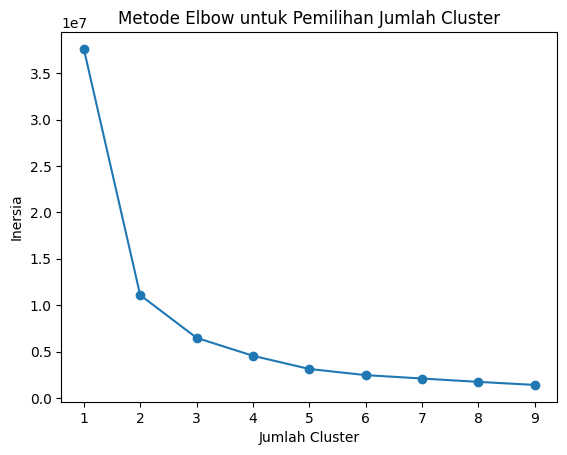

                    nama  cluster
0                   Abon        0
1           Abon haruwan        7
2              Agar-agar        5
3     Akar tonjong segar        5
4          Aletoge segar        5
...                  ...      ...
1341        Wortel Segar        5
1342        Wortel kukus        5
1343        Wortel rebus        5
1344              Yangko        6
1345             Yoghurt        5

[1346 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [115]:
# Memilih kolom yang digunakan untuk clustering
X_makanan = makanan_df[['energi', 'protein', 'lemak', 'karbohidrat']]

# Normalisasi data
X_makanan_normalized = (X_makanan - X_makanan.min()) / (X_makanan.max() - X_makanan.min())

# Mencari jumlah cluster yang optimal menggunakan metode elbow
inertia_values = []
possible_cluster_counts = range(1, 10)  # Coba dari 1 hingga 10 cluster

for num_clusters in possible_cluster_counts:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_makanan)
    inertia_values.append(kmeans.inertia_)

# Memplot hasil metode elbow
plt.plot(possible_cluster_counts, inertia_values, marker='o')
plt.title('Metode Elbow untuk Pemilihan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia')
plt.show()

# Melakukan clustering dengan KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

makanan_df['cluster'] = kmeans.fit_predict(X_makanan_normalized)

# Menampilkan hasil clustering makanan
print(makanan_df[['nama', 'cluster']])

## Clustering pada Dataset Penyakit

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-114-6e4a7760d8ff>:26: ConvergenceWarning: Number of d

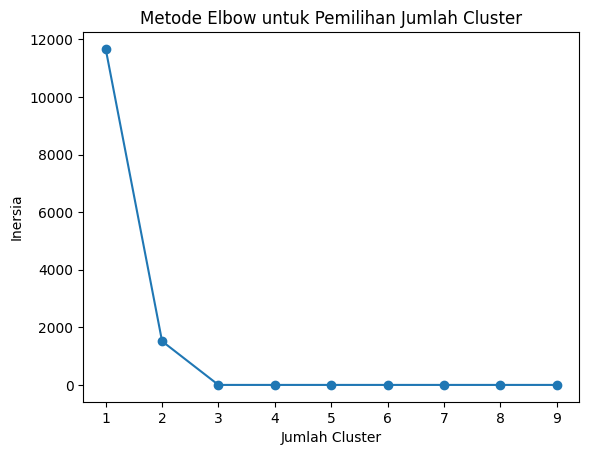

                                  Penyakit  cluster
0                         Penyakit Jantung        1
1                  Diabetes Melitus Tipe 2        0
2                               Hipertensi        0
3                                   Stroke        1
4                                   Kanker        0
5                                 Obesitas        2
6                                Asam Urat        0
7                             Radang Sendi        0
8   Penyakit Paru Obstruktif Kronis (PPOK)        0
9                                   Ginjal        0
10                                    Asma        0
11                      Penyakit Alzheimer        0
12                      Penyakit Parkinson        0
13                                Demensia        0
14                    Tekanan Darah Rendah        1
15                                  Anemia        1
16                              Malnutrisi        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


In [114]:
# Mengubah nilai rentang menjadi nilai tengah (mean)
penyakit_df[['energi_min', 'energi_max']] = penyakit_df['energi'].str.split('-', expand=True).applymap(lambda x: eval(x.replace(',', '')))
penyakit_df[['protein_min', 'protein_max']] = penyakit_df['protein'].str.split('-', expand=True).applymap(lambda x: eval(x.replace(',', '')))
penyakit_df[['lemak_min', 'lemak_max']] = penyakit_df['lemak'].str.split('-', expand=True).applymap(lambda x: eval(x.replace(',', '')))
penyakit_df[['karbohidrat_min', 'karbohidrat_max']] = penyakit_df['karbohidrat'].str.split('-', expand=True).applymap(lambda x: eval(x.replace(',', '')))

# Bagi semua nilai dengan faktor 10
penyakit_df[['energi_min', 'energi_max', 'protein_min', 'protein_max', 'lemak_min', 'lemak_max', 'karbohidrat_min', 'karbohidrat_max']] /= 10

# Menghitung nilai tengah (mean) dari rentang
penyakit_df['energi_mean'] = penyakit_df[['energi_min', 'energi_max']].mean(axis=1)
penyakit_df['protein_mean'] = penyakit_df[['protein_min', 'protein_max']].mean(axis=1)
penyakit_df['lemak_mean'] = penyakit_df[['lemak_min', 'lemak_max']].mean(axis=1)
penyakit_df['karbohidrat_mean'] = penyakit_df[['karbohidrat_min', 'karbohidrat_max']].mean(axis=1)


# Mengambil kolom-kolom yang digunakan untuk clustering
X_penyakit = penyakit_df[['energi_mean', 'protein_mean', 'lemak_mean', 'karbohidrat_mean']]

# Mencari jumlah cluster yang optimal menggunakan metode elbow
inertia_values = []
possible_cluster_counts = range(1, 10)  # Coba dari 1 hingga 10 cluster

for num_clusters in possible_cluster_counts:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_penyakit)
    inertia_values.append(kmeans.inertia_)

# Memplot hasil metode elbow
plt.plot(possible_cluster_counts, inertia_values, marker='o')
plt.title('Metode Elbow untuk Pemilihan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia')
plt.show()

penyakit_df['cluster'] = kmeans.fit_predict(X_penyakit)

# Menampilkan hasil clustering penyakit
print(penyakit_df[['Penyakit', 'cluster']])


In [ ]:
# Gabungkan DataFrame makanan dengan DataFrame penyakit berdasarkan kolom cluster
hasil_gabungan = makanan_df.merge(penyakit_df[['Penyakit', 'cluster']], how='left', left_on='cluster', right_on='cluster')

# Menampilkan hasil gabungan
print(hasil_gabungan[['nama', 'Penyakit']])

NameError: ignored


# Visualisasi Hasil Clustering

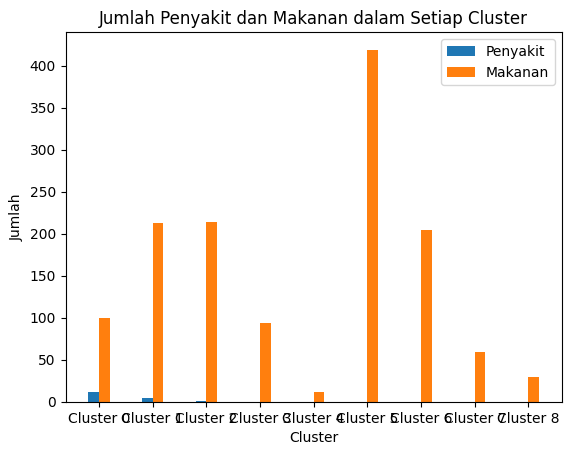

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menghitung jumlah penyakit dalam setiap cluster
cluster_counts_penyakit = penyakit_df['cluster'].value_counts().sort_index()

# Menghitung jumlah makanan dalam setiap cluster
cluster_counts_makanan = makanan_df['cluster'].value_counts().sort_index()

# Menggabungkan kedua dataframe
cluster_counts_combined = pd.concat([cluster_counts_penyakit, cluster_counts_makanan], axis=1)
cluster_counts_combined.columns = ['Penyakit', 'Makanan']
cluster_counts_combined.fillna(0, inplace=True)

# Menyiapkan posisi untuk batang
clusters = np.arange(num_clusters)

# Membuat diagram batang untuk penyakit
plt.bar(clusters - bar_width/2, cluster_counts_combined['Penyakit'], bar_width, label='Penyakit')

# Membuat diagram batang untuk makanan
plt.bar(clusters + bar_width/2, cluster_counts_combined['Makanan'], bar_width, label='Makanan')

# Menambahkan label dan judul
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.title('Jumlah Penyakit dan Makanan dalam Setiap Cluster')
plt.xticks(clusters, [f'Cluster {i}' for i in range(num_clusters)])
plt.legend()

# Tampilkan diagram batang
plt.show()


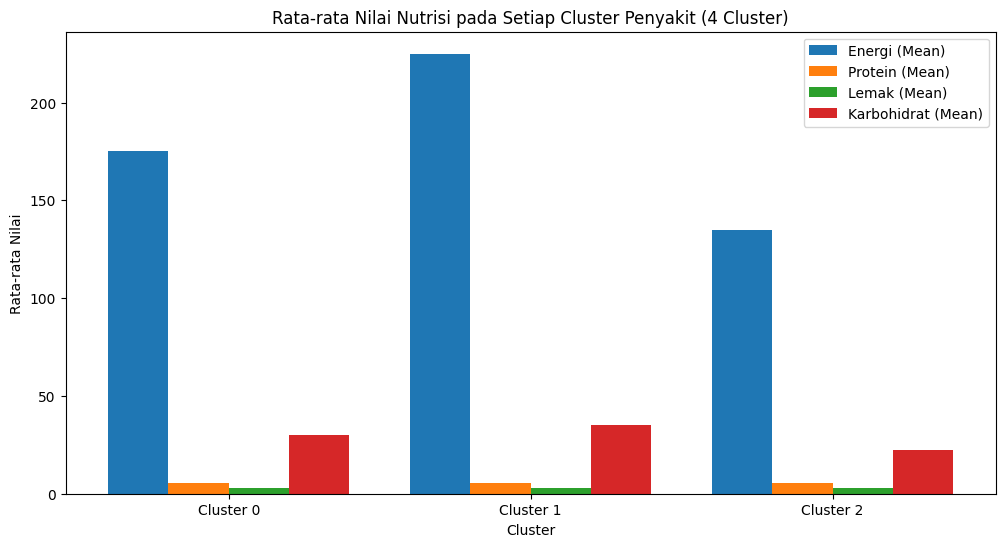

In [ ]:
# Menghitung jumlah penyakit dalam setiap cluster
cluster_counts = penyakit_df['cluster'].value_counts().sort_index()

# Menghitung nilai rata-rata fitur untuk setiap cluster pada dataset penyakit
cluster_means_penyakit = penyakit_df.groupby('cluster')[['energi_mean', 'protein_mean', 'lemak_mean', 'karbohidrat_mean']].mean()

# Menyiapkan posisi untuk batang
clusters_penyakit = np.arange(3)

# Lebar batang
bar_width = 0.2

# Membuat diagram batang untuk setiap fitur
plt.figure(figsize=(12, 6))
for i, nutrient in enumerate(['energi', 'protein', 'lemak', 'karbohidrat']):
    plt.bar(
        clusters_penyakit + i * bar_width,
        cluster_means_penyakit[f'{nutrient}_mean'],
        bar_width,
        label=f'{nutrient.capitalize()} (Mean)'
    )

# Menambahkan label dan judul
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Nilai')
plt.title('Rata-rata Nilai Nutrisi pada Setiap Cluster Penyakit (4 Cluster)')
plt.xticks(clusters_penyakit + 1.5 * bar_width, [f'Cluster {i}' for i in clusters_penyakit])
plt.legend()

# Tampilkan diagram batang
plt.show()

In [ ]:
# Menampilkan nilai 'energi', 'protein', 'lemak', 'karbohidrat' pada setiap cluster penyakit
for cluster_label, cluster_data in clustered_penyakit:
    print(f'\nCluster {cluster_label}:')
    print(cluster_data[['Penyakit', 'energi', 'protein', 'lemak', 'karbohidrat']].to_string(index=False))



Cluster 0:
                              Penyakit    energi protein lemak karbohidrat
               Diabetes Melitus Tipe 2 1500-2000   50-60 25-35     250-350
                            Hipertensi 1500-2000   50-60 25-35     250-350
                                Kanker 1500-2000   50-60 25-35     250-350
                             Asam Urat 1500-2000   50-60 25-35     250-350
                          Radang Sendi 1500-2000   50-60 25-35     250-350
Penyakit Paru Obstruktif Kronis (PPOK) 1500-2000   50-60 25-35     250-350
                                Ginjal 1500-2000   50-60 25-35     250-350
                                  Asma 1500-2000   50-60 25-35     250-350
                    Penyakit Alzheimer 1500-2000   50-60 25-35     250-350
                    Penyakit Parkinson 1500-2000   50-60 25-35     250-350
                              Demensia 1500-2000   50-60 25-35     250-350

Cluster 1:
            Penyakit    energi protein lemak karbohidrat
    Penyakit Jantun

### Kesimpulan clustered penyakit
Cluster 0: Penyakit-penyakit dalam cluster ini memiliki rekomendasi asupan energi, protein, lemak, dan karbohidrat yang relatif serupa. Rentang rekomendasi tersebut adalah 1500-2000 kalori untuk energi, 50-60 gram untuk protein, 25-35 gram untuk lemak, dan 250-350 gram untuk karbohidrat. Penyakit-penyakit ini termasuk Diabetes Melitus Tipe 2, Hipertensi, Kanker, Asam Urat, Radang Sendi, PPOK, Ginjal, Asma, Penyakit Alzheimer, Penyakit Parkinson, dan Demensia.

Cluster 1: Penyakit-penyakit dalam cluster ini memiliki rekomendasi asupan energi, protein, lemak, dan karbohidrat yang sedikit lebih tinggi dibandingkan Cluster 0. Rentang rekomendasi untuk cluster ini adalah 2000-2500 kalori untuk energi, 50-60 gram untuk protein, 25-35 gram untuk lemak, dan 300-400 gram untuk karbohidrat. Penyakit-penyakit ini mencakup Penyakit Jantung, Stroke, Tekanan Darah Rendah, Anemia, dan Malnutrisi.

Cluster 2: Penyakit dalam cluster ini, khususnya Obesitas, memiliki rekomendasi asupan energi yang lebih rendah daripada kedua cluster sebelumnya. Rentang rekomendasi untuk cluster ini adalah 1200-1500 kalori untuk energi, 50-60 gram untuk protein, 25-35 gram untuk lemak, dan 200-250 gram untuk karbohidrat.

Kesimpulan: Dapat dilihat bahwa setiap cluster memiliki pola rekomendasi asupan energi, protein, lemak, dan karbohidrat yang berbeda, sesuai dengan karakteristik penyakit yang termasuk dalam masing-masing cluster. Cluster 0 memiliki rekomendasi sedang, Cluster 1 memiliki rekomendasi tinggi, sementara Cluster 2 memiliki rekomendasi rendah untuk asupan energi.

<ipython-input-20-467b7adb9023>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means_makanan = makanan_df.groupby('cluster').mean()


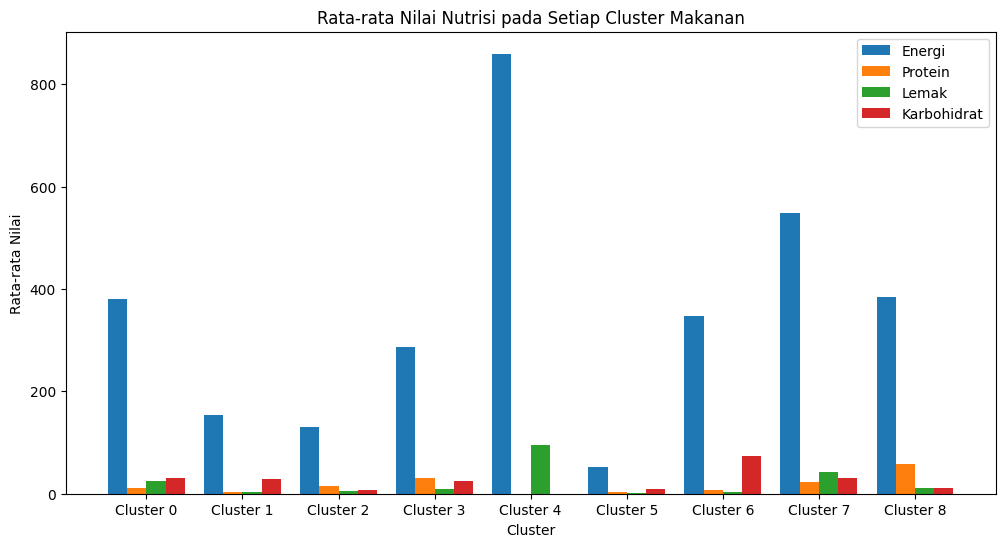

In [ ]:
# Menghitung jumlah makanan dalam setiap cluster
cluster_counts_makanan = makanan_df['cluster'].value_counts().sort_index()

# Menghitung nilai rata-rata fitur untuk setiap cluster pada dataset makanan
cluster_means_makanan = makanan_df.groupby('cluster').mean()

# Menyiapkan posisi untuk batang
clusters_makanan = np.arange(num_clusters)

# Lebar batang
bar_width = 0.2

# Membuat diagram batang untuk setiap fitur
plt.figure(figsize=(12, 6))
for i, nutrient in enumerate(['energi', 'protein', 'lemak', 'karbohidrat']):
    plt.bar(
        clusters_makanan + i * bar_width,
        cluster_means_makanan[f'{nutrient}'],
        bar_width,
        label=nutrient.capitalize()
    )

# Menambahkan label dan judul
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Nilai')
plt.title('Rata-rata Nilai Nutrisi pada Setiap Cluster Makanan')
plt.xticks(clusters_makanan + 1.5 * bar_width, [f'Cluster {i}' for i in clusters_makanan])
plt.legend()

# Tampilkan diagram batang
plt.show()

In [ ]:
# Mengelompokkan makanan berdasarkan cluster
clustered_makanan = makanan_df.groupby('cluster')

# Menghitung rata-rata 'energi', 'protein', 'lemak', dan 'karbohidrat' tiap cluster
cluster_means = clustered_makanan[['energi', 'protein', 'lemak', 'karbohidrat']].mean()

# Menampilkan hasil
print(cluster_means)


             energi    protein      lemak  karbohidrat
cluster                                               
0        381.163000  10.319000  24.824000    31.358000
1        154.558685   3.309859   3.115023    28.920657
2        130.412617  16.039720   4.712150     7.203271
3        287.340426  30.330851   8.798936    23.880851
4        859.333333   0.300000  95.875000     0.150000
5         52.797375   2.563962   1.008592     9.476134
6        348.019024   6.361463   3.896098    73.203902
7        547.423729  22.537288  42.479661    30.477966
8        383.300000  57.646667  11.620000    10.523333


### Kesimpulan clustered makanan

Cluster 0: Makanan dalam cluster ini memiliki tingkat energi yang cukup tinggi (381.16 kcal) dengan proporsi protein (10.32 g), lemak (24.82 g), dan karbohidrat (31.36 g) yang seimbang.

Cluster 1: Makanan dalam cluster ini memiliki tingkat energi yang rendah (154.56 kcal) dengan proporsi protein (3.31 g), lemak (3.12 g), dan karbohidrat (28.92 g). Cenderung menjadi makanan rendah kalori.

Cluster 2: Makanan dalam cluster ini memiliki tingkat energi yang sangat rendah (130.41 kcal) dengan proporsi protein (16.04 g), lemak (4.71 g), dan karbohidrat (7.20 g). Cenderung menjadi makanan rendah kalori dan rendah lemak.

Cluster 3: Makanan dalam cluster ini memiliki tingkat energi yang cukup tinggi (287.34 kcal) dengan proporsi protein (30.33 g), lemak (8.80 g), dan karbohidrat (23.88 g). Cenderung menjadi makanan tinggi protein.

Cluster 4: Makanan dalam cluster ini memiliki tingkat energi yang sangat tinggi (859.33 kcal) dengan lemak yang sangat tinggi (95.88 g) namun protein dan karbohidratnya sangat rendah. Cenderung menjadi makanan tinggi lemak.

Cluster 5: Makanan dalam cluster ini memiliki tingkat energi yang sangat rendah (52.80 kcal) dengan proporsi protein (2.56 g), lemak (1.01 g), dan karbohidrat (9.48 g). Cenderung menjadi makanan rendah kalori.

Cluster 6: Makanan dalam cluster ini memiliki tingkat energi yang cukup tinggi (348.02 kcal) dengan proporsi protein (6.36 g), lemak (3.90 g), dan karbohidrat (73.20 g). Cenderung menjadi makanan tinggi karbohidrat.

Cluster 7: Makanan dalam cluster ini memiliki tingkat energi yang tinggi (547.42 kcal) dengan proporsi protein (22.54 g), lemak (42.48 g), dan karbohidrat (30.48 g). Cenderung menjadi makanan tinggi energi dan tinggi lemak.

Cluster 8: Makanan dalam cluster ini memiliki tingkat energi yang tinggi (383.30 kcal) dengan proporsi protein yang sangat tinggi (57.65 g) dan lemak yang cukup tinggi (11.62 g). Cenderung menjadi makanan tinggi protein dan tinggi energi.

Kesimpulan: Setiap cluster mewakili kelompok makanan dengan karakteristik kandungan energi, protein, lemak, dan karbohidrat yang berbeda. Cluster 0 hampir seimbang, Cluster 3 tinggi protein, Cluster 4 sangat tinggi lemak, Cluster 6 tinggi karbohidrat, dan Cluster 8 sangat tinggi protein dan energi. Cluster 2, 5, dan 1 cenderung memiliki kandungan energi yang rendah. Cluster 7 memiliki kandungan energi tinggi dengan proporsi lemak yang tinggi.

### Dari ke 2 data dapat disimpulkan bahwa setiap cluster memiliki hubungan berdasarkan kecocokan energi, protein, lemak, dan karbohidrat

berikut hubungan tiap cluster penyakit dengan cluster makanan:

#### **Cluster Penyakit 0:**

Cluster Makanan 0: Cluster makanan dengan tingkat energi yang cukup tinggi, seimbang antara protein, lemak, dan karbohidrat.

Cluster Makanan 3: Cluster makanan dengan tingkat energi yang cukup tinggi, seimbang antara protein, lemak, dan karbohidrat.


#### **Cluster Penyakit 1:**

Cluster Makanan 4: Cluster makanan dengan tingkat energi yang sangat tinggi, sangat tinggi lemak, dan rendah protein dan karbohidrat.

Cluster Makanan 6: Cluster makanan dengan tingkat energi yang cukup tinggi, tinggi karbohidrat, dan rendah protein dan lemak.

Cluster Makanan 7: Cluster makanan dengan tingkat energi yang tinggi, tinggi lemak, dan tinggi protein, tetapi rendah karbohidrat.

Cluster Makanan 8: Cluster makanan dengan tingkat energi yang tinggi, sangat tinggi protein, dan cukup tinggi lemak, tetapi rendah karbohidrat.

#### **Cluster Penyakit 2:**

Cluster Makanan 1: Cluster makanan dengan tingkat energi yang rendah, rendah protein dan lemak, tetapi tinggi karbohidrat.

Cluster Makanan 2: Cluster makanan dengan tingkat energi yang sangat rendah, tinggi protein, rendah lemak dan karbohidrat.

Cluster Makanan 5: Cluster makanan dengan tingkat energi yang sangat rendah, rendah protein dan lemak, tetapi tinggi karbohidrat.

# Ujicoba Menggunakan Sistem Rekomendasi Berdasarkan Nama Penyakit

## Menggunakan pendekatan sederhana berdasarkan cluster yang sesuai

In [70]:
import json

# Example data
food_recom = {
    0: [0, 3],
    1: [4, 6, 7, 8],
    2: [1, 2, 5],
}

# Convert to JSON
json_data = json.dumps(food_recom, indent=2)
print(json_data)


{
  "0": [
    0,
    3
  ],
  "1": [
    4,
    6,
    7,
    8
  ],
  "2": [
    1,
    2,
    5
  ]
}


In [71]:
# Create penyakit_recom
penyakit_recom = {}

# Invert the mapping
for cluster_makanan, cluster_penyakit_list in food_recom.items():
    for cluster_penyakit in cluster_penyakit_list:
        if cluster_penyakit not in penyakit_recom:
            penyakit_recom[cluster_penyakit] = []
        penyakit_recom[cluster_penyakit].append(cluster_makanan)

# Convert to JSON
json_data_penyakit_recom = json.dumps(penyakit_recom, indent=2)
print(json_data_penyakit_recom)

{
  "0": [
    0
  ],
  "3": [
    0
  ],
  "4": [
    1
  ],
  "6": [
    1
  ],
  "7": [
    1
  ],
  "8": [
    1
  ],
  "1": [
    2
  ],
  "2": [
    2
  ],
  "5": [
    2
  ]
}


In [72]:
with open('/content/drive/MyDrive/Colab Notebooks/TBI/penyakit_recom.json', 'w') as json_file:
    json.dump(penyakit_recom, json_file)

In [73]:
# export json
with open('/content/drive/MyDrive/Colab Notebooks/TBI/food_recom.json', 'w') as json_file:
    json.dump(food_recom, json_file)

## Rekomendasi Makanan berdasar Penyakit

In [74]:
import json
import pandas as pd

# Load clustered penyakit data
penyakit_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TBI/low_clustered_penyakit.csv')

# Load clustered makanan data
makanan_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TBI/clustered_makanan.csv')

# Load food recommendation data from JSON
with open('/content/drive/MyDrive/Colab Notebooks/TBI/food_recom.json', 'r') as json_file:
    food_recom = json.load(json_file)

# Function to recommend foods based on disease
def rekomendasi_makanan(nama_penyakit):
    try:
        # Get cluster_penyakit from the loaded data
        cluster_penyakit = penyakit_df.loc[penyakit_df['Penyakit'].str.lower() == nama_penyakit.lower(), 'cluster'].values[0]

        # Get food cluster from food_recom if available
        if str(cluster_penyakit) in food_recom:
            cluster_makanan = food_recom[str(cluster_penyakit)]

            # Recommend foods from the cluster
            rekomendasi_cluster = makanan_df.loc[makanan_df['cluster'].isin(cluster_makanan), 'nama'].tolist()

            return rekomendasi_cluster
        else:
            print(f"Tidak ada rekomendasi makanan untuk cluster {cluster_penyakit}.")
            return []

    except IndexError:
        print(f"Penyakit {nama_penyakit} tidak ditemukan dalam data.")
        return []
    except KeyError:
        print(f"Cluster tidak ditemukan untuk penyakit {nama_penyakit}.")
        return []

# Usage
nama_penyakit_input = "Obesitas"
hasil_rekomendasi = rekomendasi_makanan(nama_penyakit_input)
print(f"Rekomendasi makanan untuk {nama_penyakit_input}: {hasil_rekomendasi}")


Rekomendasi makanan untuk Obesitas: ['Agar-agar', 'Akar tonjong segar', 'Aletoge segar', 'Alpukat segar', 'Ampas kacang hijau', 'Ampas tahu kukus', 'Ampas tahu mentah', 'Anak sapi daging gemuk segar', 'Anak sapi daging kurus segar', 'Anak sapi daging sedang segar', 'Andaliman segar', 'Andewi', 'Anggur hutan segar', 'Anyang sayur', 'Apel', 'Apel malang segar', 'Arbei', 'Ares sayur', 'Arrowroot segar', 'Asam kandis segar', 'Asam masak di pohon', 'Asam payak segar', 'Asinan Bogor sayuran', 'Ayam dideh/darah segar', 'Babat', 'Babi ginjal segar', 'Babi hati segar', 'Bacang', 'Baje', 'Bakso ', 'Bakung segar', 'Baligo', 'Bantal', 'Barongko', 'Batang Tading', 'Batar daan', 'Batatas gembili segar', 'Batatas kelapa ubi bakar', 'Batatas kelapa ubi kukus', 'Batatas kelapa ubi segar', 'Batatas tali ubi rebus', 'Bawang Bombay', 'Bawang Merah', 'Bawang Putih', 'Bayam kukus', 'Bayam Merah', 'Bayam merah segar', 'Bayam rebus', 'Bayam segar', 'Bayam tumis + oncom', 'Bayam tumis bersantan', 'Beberuk', 'B

## Rekomendasi Penyakit berdasar nma makanan

In [75]:
import json
import pandas as pd

# Load clustered penyakit data
penyakit_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TBI/low_clustered_penyakit.csv')

# Load clustered makanan data
makanan_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TBI/clustered_makanan.csv')

# Load food recommendation data from JSON
with open('/content/drive/MyDrive/Colab Notebooks/TBI/food_recom.json', 'r') as json_file:
    food_recom = json.load(json_file)

# Function to recommend penyakit based on food
def rekomendasi_penyakit(nama_makanan):
    try:
        # Get food cluster from the loaded data
        cluster_makanan = makanan_df.loc[makanan_df['nama'].str.lower() == nama_makanan.lower(), 'cluster'].values[0]

        # Find penyakit clusters associated with the food cluster in food_recom
        penyakit_clusters = [penyakit_cluster for penyakit_cluster, foods in food_recom.items() if cluster_makanan in foods]

        # If there are penyakit clusters, get penyakit names from penyakit_df
        if penyakit_clusters:
            rekomendasi_penyakit = penyakit_df.loc[penyakit_df['cluster'].astype(str).isin(penyakit_clusters), 'Penyakit'].tolist()
            return rekomendasi_penyakit
        else:
            print(f"Tidak ada rekomendasi penyakit untuk makanan {nama_makanan}.")
            return []

    except IndexError:
        print(f"Makanan {nama_makanan} tidak ditemukan dalam data.")
        return []
    except KeyError:
        print(f"Cluster tidak ditemukan untuk makanan {nama_makanan}.")
        return []

# Usage
nama_makanan_input = "Ayam goreng paha"
hasil_rekomendasi = rekomendasi_penyakit(nama_makanan_input)
print(f"Rekomendasi penyakit untuk makanan {nama_makanan_input}: {hasil_rekomendasi}")


Rekomendasi penyakit untuk makanan Ayam goreng paha: ['diabetes melitus tipe 2', 'hipertensi', 'kanker', 'asam urat', 'radang sendi', 'penyakit paru obstruktif kronis (ppok)', 'ginjal', 'asma', 'penyakit alzheimer', 'penyakit parkinson', 'demensia']


In [116]:
# Menyimpan hasil clustering penyakit ke dalam file CSV
penyakit_df.to_csv('/content/drive/MyDrive/Colab Notebooks/TBI/clustered_penyakit.csv', index=False)

# Menyimpan hasil clustering makanan ke dalam file CSV
makanan_df.to_csv('/content/drive/MyDrive/Colab Notebooks/TBI/clustered_makanan.csv', index=False)


In [41]:

# Load clustered penyakit data
penyakit_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TBI/clustered_makanan.csv')

# Lowercase the "Penyakit" column
penyakit_df['nama'] = penyakit_df['nama'].str.lower()

# Save the DataFrame to a new CSV file
penyakit_df.to_csv('/content/drive/MyDrive/Colab Notebooks/TBI/low_clustered_makanan.csv', index=False)


# **LSI + TF-IDF + Similarity Calculation**

## 1. TF-IDF (Term Frequency-Inverse Document Frequency):

Matriks TF-IDF digunakan untuk merepresentasikan bobot kata-kata dalam dokumen-dokumen (penyakit dan makanan). TF-IDF memberikan bobot yang lebih tinggi pada kata-kata yang lebih penting untuk dokumen tertentu, membantu mengidentifikasi kata-kata yang mewakili dokumen dengan baik.

## 2. Model LSI (Latent Semantic Indexing):

Model LSI digunakan untuk menemukan pola atau struktur semantik dalam matriks TF-IDF yang mencerminkan makna laten dari kata-kata dalam dokumen. Ini dapat membantu meningkatkan pengambilan informasi dengan mengurangi dimensi data.

## 3. Similarity Calculation:

Penggunaan similarity calculation (perhitungan kesamaan) dalam mengukur sejauh mana query penyakit serupa dengan data penyakit. Similarity calculation pada umumnya adalah bagian integral dari sistem IR.

## **Teknik pemrosesan text yang akan digunakan menurut beberapa jurnal:**

### 1. Case Folding.
Case folding adalah proses mengubah semua karakter dalam teks menjadi huruf kecil atau huruf besar. Karena dataset sudah diproses dan data namapenyakit sudah di lowercase jadi inputan akan di ubah menjadi lower case *hehehehe*

### 2. Tokenisasi:

Tokenisasi adalah proses membagi teks menjadi token atau unit kata. Dalam kode ini akan dilakukan  tokenisasi menggunakan modul NLTK dengan fungsi

### 3. Stemming:

Stemming adalah proses menghapus akhiran kata sehingga hanya menyisakan akar kata. ***nltk.stem***.

### 4. TF-IDF (Term Frequency-Inverse Document Frequency):

TF-IDF adalah metode yang digunakan untuk memberikan bobot pada kata-kata dalam dokumen berdasarkan seberapa sering kata tersebut muncul di dokumen tersebut dan seberapa umum kata tersebut di seluruh dokumen. Rencananya, matriks TF-IDF dibuat untuk penyakit dan makanan menggunakan modul Gensim.

### 5. LSI (Latent Semantic Indexing):

LSI adalah metode yang digunakan untuk menemukan struktur semantik dalam dokumen dengan menerapkan reduksi dimensi. Model LSI dibuat untuk penyakit dan makanan menggunakan matriks TF-IDF:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Rekomendasi Makanan

In [22]:
import pandas as pd
from gensim import corpora, models, similarities
import json
import nltk
import numpy as np

# Specify the NLTK data path
nltk.data.path.append("/usr/local/share/nltk_data")

# Download the NLTK resource for tokenization
nltk.download('punkt', download_dir="/usr/local/share/nltk_data")

# Load clustered penyakit data
penyakit_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TBI/low_clustered_penyakit.csv')

# Load clustered makanan data
makanan_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TBI/low_clustered_makanan.csv')

# Load food recommendation data from JSON
with open('/content/drive/MyDrive/Colab Notebooks/TBI/food_recom.json', 'r') as json_file:
    food_recom = json.load(json_file)

# Membuat Corpus untuk penyakit
corpus_penyakit = [nltk.word_tokenize(str(row['Penyakit'])) for index, row in penyakit_df.iterrows()]

# Membuat Corpus untuk makanan
corpus_makanan = [nltk.word_tokenize(str(row['nama'])) for index, row in makanan_df.iterrows()]

# Membuat kamus kata dari corpus penyakit dan makanan
dictionary = corpora.Dictionary(corpus_penyakit + corpus_makanan)

# Membuat matriks TF-IDF untuk penyakit
tfidf_penyakit = models.TfidfModel([dictionary.doc2bow(text) for text in corpus_penyakit])
corpus_tfidf_penyakit = tfidf_penyakit[[dictionary.doc2bow(text) for text in corpus_penyakit]]

# Membuat matriks TF-IDF untuk makanan
tfidf_makanan = models.TfidfModel([dictionary.doc2bow(text) for text in corpus_makanan])
corpus_tfidf_makanan = tfidf_makanan[[dictionary.doc2bow(text) for text in corpus_makanan]]

# Membuat model LSI untuk penyakit
lsi_penyakit = models.LsiModel(corpus_tfidf_penyakit, id2word=dictionary, num_topics=5)

# Membuat model LSI untuk makanan
lsi_makanan = models.LsiModel(corpus_tfidf_makanan, id2word=dictionary, num_topics=5)

# Membuat index untuk penyakit
index_penyakit = similarities.MatrixSimilarity(lsi_penyakit[corpus_tfidf_penyakit])

# Membuat index untuk makanan
index_makanan = similarities.MatrixSimilarity(lsi_makanan[corpus_tfidf_makanan])

[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [45]:
#  input penyakit
input_penyakit = "diabetes".lower()

# Membuat vektor query untuk penyakit
vec_query_penyakit = lsi_penyakit[dictionary.doc2bow(nltk.word_tokenize(input_penyakit))]

# Menghitung skor kesamaan antara query penyakit dan data penyakit
sims_penyakit = index_penyakit[vec_query_penyakit]

# Threshold for considering the similarity score
similarity_threshold = 0.5

# Mendapatkan cluster penyakit
cluster_penyakit_index = np.argmax(sims_penyakit)

# Mendapatkan nilai pada kolom "cluster" sesuai dengan indeks kluster
cluster_penyakit_value = penyakit_df.loc[cluster_penyakit_index, 'cluster']

# Check if the similarity score is above the threshold
if sims_penyakit[cluster_penyakit_index] > similarity_threshold:
    # Debugging Information
    print("Similarity Scores:", sims_penyakit)
    print("Cluster Penyakit Index:", cluster_penyakit_index)
    print("Cluster Penyakit Value:", cluster_penyakit_value)

    # Check if the obtained cluster is valid
    if str(cluster_penyakit_value) in food_recom:
        # Mendapatkan cluster makanan dari food recommendation
        cluster_makanan = food_recom[str(cluster_penyakit_value)]

        if cluster_makanan:
            # Menampilkan nama makanan berdasarkan cluster makanan
            nama_makanan = makanan_df[makanan_df['cluster'].isin(cluster_makanan)]['nama'].tolist()
            print("Makanan rekomendasi untuk", input_penyakit, "adalah:", nama_makanan)
        else:
            print("Tidak ada rekomendasi makanan untuk penyakit", input_penyakit)
    else:
        print("Cluster penyakit tidak valid:", cluster_penyakit_value)
else:
    print("Tidak ada rekomendasi makanan untuk penyakit", input_penyakit)

Similarity Scores: [ 0.          1.          0.6455766  -0.44021535 -0.05201089 -0.40558338
  0.75253206  0.7582583   0.          0.01889321 -0.3389671   0.
  0.          0.70141137  0.10043092 -0.3199154  -0.6026981 ]
Cluster Penyakit Index: 1
Cluster Penyakit Value: 0
Makanan rekomendasi untuk diabetes adalah: ['Abon', 'Ampas Tahu', 'Angsa', 'Arwan sirsir', 'Ayam', 'Ayam  goreng Kentuckysayap', 'Ayam ampela goreng', 'Ayam goreng church texa sayap', 'Ayam goreng church texas dada', 'Ayam goreng kalasan paha', 'Ayam goreng kentucky dada', 'Ayam goreng Kentucky paha', 'Ayam goreng mbok berek dada', 'Ayam goreng paha', 'Ayam goreng pasundan dada', 'Ayam goreng pasundan paha', 'Ayam goreng pioneer dada', 'Ayam goreng sukabumi dada', 'Ayam goreng sukabumi paha', 'Ayam hati segar', 'Ayam taliwang masakan', 'Babi daging kurus segar', 'Babi hutan masak rica masakan', 'Bagea kenari asin', 'Bagea kenari manis', 'Bebek (itik)', 'Bebek alabio daging segar', 'Bebek daging goreng', 'Belut goreng', 

## Rekomendasi penyakit yang boleh memakan makanan

In [81]:
import pandas as pd
from gensim import corpora, models, similarities
import json
import nltk
import numpy as np

# Specify the NLTK data path
nltk.data.path.append("/usr/local/share/nltk_data")

# Download the NLTK resource for tokenization
nltk.download('punkt', download_dir="/usr/local/share/nltk_data")

# Load clustered penyakit data
penyakit_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TBI/low_clustered_penyakit.csv')

# Load clustered makanan data
makanan_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TBI/low_clustered_makanan.csv')

# Load penyakit recommendation data from JSON
with open('/content/drive/MyDrive/Colab Notebooks/TBI/penyakit_recom.json', 'r') as json_file:
    penyakit_recom = json.load(json_file)

# Membuat Corpus untuk penyakit
corpus_penyakit = [nltk.word_tokenize(str(row['Penyakit'])) for index, row in penyakit_df.iterrows()]

# Membuat Corpus untuk makanan
corpus_makanan = [nltk.word_tokenize(str(row['nama'])) for index, row in makanan_df.iterrows()]

# Membuat kamus kata dari corpus penyakit dan makanan
dictionary = corpora.Dictionary(corpus_penyakit + corpus_makanan)

# Membuat matriks TF-IDF untuk penyakit
tfidf_penyakit = models.TfidfModel([dictionary.doc2bow(text) for text in corpus_penyakit])
corpus_tfidf_penyakit = tfidf_penyakit[[dictionary.doc2bow(text) for text in corpus_penyakit]]

# Membuat matriks TF-IDF untuk makanan
tfidf_makanan = models.TfidfModel([dictionary.doc2bow(text) for text in corpus_makanan])
corpus_tfidf_makanan = tfidf_makanan[[dictionary.doc2bow(text) for text in corpus_makanan]]

# Membuat model LSI untuk penyakit
lsi_penyakit = models.LsiModel(corpus_tfidf_penyakit, id2word=dictionary, num_topics=5)

# Membuat model LSI untuk makanan
lsi_makanan = models.LsiModel(corpus_tfidf_makanan, id2word=dictionary, num_topics=5)

# Membuat index untuk penyakit
index_penyakit = similarities.MatrixSimilarity(lsi_penyakit[corpus_tfidf_penyakit])

# Membuat index untuk makanan
index_makanan = similarities.MatrixSimilarity(lsi_makanan[corpus_tfidf_makanan])

#  input makanan
input_makanan = "paha ayam".lower()

# Membuat vektor query untuk makanan
vec_query_makanan = lsi_makanan[dictionary.doc2bow(nltk.word_tokenize(input_makanan))]

# Menghitung skor kesamaan antara query makanan dan data makanan
sims_makanan = index_makanan[vec_query_makanan]

# Threshold for considering the similarity score
similarity_threshold = 0.5

# Mendapatkan cluster makanan
cluster_makanan_index = np.argmax(sims_makanan)

# Mendapatkan nilai pada kolom "cluster" sesuai dengan indeks kluster
cluster_makanan_value = makanan_df.loc[cluster_makanan_index, 'cluster']

# Check if the similarity score is above the threshold
if sims_makanan[cluster_makanan_index] > similarity_threshold:
    # Debugging Information
    print("Similarity Scores:", sims_makanan)
    print("Cluster Makanan Index:", cluster_makanan_index)
    print("Cluster Makanan Value:", cluster_makanan_value)

  # Check if the obtained cluster is valid
if str(cluster_makanan_value) in penyakit_recom:
    # Mendapatkan cluster penyakit dari penyakit recommendation
    cluster_penyakit = penyakit_recom[str(cluster_makanan_value)]
    print(cluster_penyakit)

    if cluster_penyakit:
        # Menampilkan nama penyakit berdasarkan cluster penyakit
        nama_penyakit = penyakit_df[penyakit_df['cluster'].isin(cluster_penyakit)]['Penyakit'].tolist()
        print("Penyakit rekomendasi untuk", input_makanan, "adalah:", nama_penyakit)
    else:
        print("Tidak ada rekomendasi penyakit untuk makanan", input_makanan)
else:
    print("Cluster makanan tidak valid:", cluster_makanan_value)

[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Similarity Scores: [ 0.91569245  0.91343194  0.4999979  ... -0.15744261  0.7551017
 -0.40143618]
Cluster Makanan Index: 29
Cluster Makanan Value: 0
[0]
Penyakit rekomendasi untuk paha ayam adalah: ['diabetes melitus tipe 2', 'hipertensi', 'kanker', 'asam urat', 'radang sendi', 'penyakit paru obstruktif kronis (ppok)', 'ginjal', 'asma', 'penyakit alzheimer', 'penyakit parkinson', 'demensia']


# Refactor code

In [117]:
import pandas as pd
from gensim import corpora, models, similarities
import json
import nltk
import numpy as np

def recommend_food_for_disease(penyakit_df_path, makanan_df_path, food_recom_path, input_penyakit):
    # Specify the NLTK data path
    nltk.data.path.append("/usr/local/share/nltk_data")

    # Download the NLTK resource for tokenization
    nltk.download('punkt', download_dir="/usr/local/share/nltk_data")

    # Load clustered penyakit data
    penyakit_df = pd.read_csv(penyakit_df_path)

    # Load clustered makanan data
    makanan_df = pd.read_csv(makanan_df_path)

    # Load food recommendation data from JSON
    with open(food_recom_path, 'r') as json_file:
        food_recom = json.load(json_file)

    # Membuat Corpus untuk penyakit
    corpus_penyakit = [nltk.word_tokenize(str(row['Penyakit'])) for index, row in penyakit_df.iterrows()]

    # Membuat Corpus untuk makanan
    corpus_makanan = [nltk.word_tokenize(str(row['nama'])) for index, row in makanan_df.iterrows()]

    # Membuat kamus kata dari corpus penyakit dan makanan
    dictionary = corpora.Dictionary(corpus_penyakit + corpus_makanan)

    # Membuat matriks TF-IDF untuk penyakit
    tfidf_penyakit = models.TfidfModel([dictionary.doc2bow(text) for text in corpus_penyakit])
    corpus_tfidf_penyakit = tfidf_penyakit[[dictionary.doc2bow(text) for text in corpus_penyakit]]

    # Membuat matriks TF-IDF untuk makanan
    tfidf_makanan = models.TfidfModel([dictionary.doc2bow(text) for text in corpus_makanan])
    corpus_tfidf_makanan = tfidf_makanan[[dictionary.doc2bow(text) for text in corpus_makanan]]

    # Membuat model LSI untuk penyakit
    lsi_penyakit = models.LsiModel(corpus_tfidf_penyakit, id2word=dictionary, num_topics=5)

    # Membuat model LSI untuk makanan
    lsi_makanan = models.LsiModel(corpus_tfidf_makanan, id2word=dictionary, num_topics=5)

    # Membuat index untuk penyakit
    index_penyakit = similarities.MatrixSimilarity(lsi_penyakit[corpus_tfidf_penyakit])

    # Membuat index untuk makanan
    index_makanan = similarities.MatrixSimilarity(lsi_makanan[corpus_tfidf_makanan])

    # Membuat vektor query untuk penyakit
    vec_query_penyakit = lsi_penyakit[dictionary.doc2bow(nltk.word_tokenize(input_penyakit.lower()))]

    # Menghitung skor kesamaan antara query penyakit dan data penyakit
    sims_penyakit = index_penyakit[vec_query_penyakit]

    # Threshold for considering the similarity score
    similarity_threshold = 0.5

    # Mendapatkan cluster penyakit
    cluster_penyakit_index = np.argmax(sims_penyakit)

    # Mendapatkan nilai pada kolom "cluster" sesuai dengan indeks kluster
    cluster_penyakit_value = penyakit_df.loc[cluster_penyakit_index, 'cluster']

    # Check if the similarity score is above the threshold
    if sims_penyakit[cluster_penyakit_index] > similarity_threshold:
        # Check if the obtained cluster is valid
        if str(cluster_penyakit_value) in food_recom:
            # Mendapatkan cluster makanan dari food recommendation
            cluster_makanan = food_recom.get(str(cluster_penyakit_value), [])

            if cluster_makanan:
                # Menampilkan nama makanan berdasarkan cluster makanan
                nama_makanan = makanan_df[makanan_df['cluster'].isin(cluster_makanan)][[ 'energi', 'protein', 'lemak', 'karbohidrat', 'nama', 'gambar']]
                result_json = nama_makanan.to_json(orient='records', default_handler=str)

                return result_json
            else:
                return json.dumps({"message": "Tidak ada rekomendasi makanan untuk penyakit", "input_penyakit": input_penyakit})
        else:
            return json.dumps({"message": "Cluster penyakit tidak valid:", "cluster_penyakit_value": cluster_penyakit_value})
    else:
        return None

# usage
penyakit_df_path = '/content/drive/MyDrive/Colab Notebooks/TBI/low_clustered_penyakit.csv'
makanan_df_path = '/content/drive/MyDrive/Colab Notebooks/TBI/clustered_makanan.csv'
food_recom_path = '/content/drive/MyDrive/Colab Notebooks/TBI/food_recom.json'
input_penyakit = "diabetes"

result = recommend_food_for_disease(penyakit_df_path, makanan_df_path, food_recom_path, input_penyakit)
print(result)


[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[{"energi":280.0,"protein":9.2,"lemak":28.4,"karbohidrat":0.0,"nama":"Abon","gambar":"https:\/\/img-cdn.medkomtek.com\/PbrY9X3ignQ8sVuj_LU9UXljyew=\/0x0\/smart\/filters:quality(75):strip_icc():format(webp)\/article\/7g8ceHGDNMuttlBcXEl8d\/original\/099726800_1605161502-Mana-yang-Lebih-Sehat-Abon-Sapi-atau-Abon-Ayam-shutterstock_1361446550.jpg"},{"energi":414.0,"protein":26.6,"lemak":18.3,"karbohidrat":41.3,"nama":"Ampas Tahu","gambar":"https:\/\/palpres.disway.id\/upload\/9e9c1ba592cac7270de5e48889a33523.jpeg"},{"energi":354.0,"protein":16.4,"lemak":31.5,"karbohidrat":0.0,"nama":"Angsa","gambar":"https:\/\/cdn.idntimes.com\/content-images\/community\/2020\/06\/images-11-7778c46373d99fb101fe76ba287b7cca.jpeg"},{"energi":277.0,"protein":2.4,"lemak":25.0,"karbohidrat":10.7,"nama":"Arwan sirsir","gambar":"https:\/\/scontent.fcgk35-1.fna.fbcdn.net\/v\/t1.6435-9\/121695429_676597869941401_1458702638921645964_n.jpg?_nc_cat=100&ccb=1-7&_nc_sid=a26aad&_nc_ohc=__IwAVKho7AAX9vwknv&_nc_ht=scontent

## Rekomendasi penyakit yang boleh makan

In [112]:
import pandas as pd
from gensim import corpora, models, similarities
import json
import nltk
import numpy as np

def recommend_disease_for_food(penyakit_df_path, makanan_df_path, penyakit_recom_path, input_makanan):
    # Specify the NLTK data path
    nltk.data.path.append("/usr/local/share/nltk_data")

    # Download the NLTK resource for tokenization
    nltk.download('punkt', download_dir="/usr/local/share/nltk_data")

    # Load clustered penyakit data
    penyakit_df = pd.read_csv(penyakit_df_path)

    # Load clustered makanan data
    makanan_df = pd.read_csv(makanan_df_path)

    # Load penyakit recommendation data from JSON
    with open(penyakit_recom_path, 'r') as json_file:
        penyakit_recom = json.load(json_file)

    # Membuat Corpus untuk penyakit
    corpus_penyakit = [nltk.word_tokenize(str(row['Penyakit'])) for index, row in penyakit_df.iterrows()]

    # Membuat Corpus untuk makanan
    corpus_makanan = [nltk.word_tokenize(str(row['nama'])) for index, row in makanan_df.iterrows()]

    # Membuat kamus kata dari corpus penyakit dan makanan
    dictionary = corpora.Dictionary(corpus_penyakit + corpus_makanan)

    # Membuat matriks TF-IDF untuk penyakit
    tfidf_penyakit = models.TfidfModel([dictionary.doc2bow(text) for text in corpus_penyakit])
    corpus_tfidf_penyakit = tfidf_penyakit[[dictionary.doc2bow(text) for text in corpus_penyakit]]

    # Membuat matriks TF-IDF untuk makanan
    tfidf_makanan = models.TfidfModel([dictionary.doc2bow(text) for text in corpus_makanan])
    corpus_tfidf_makanan = tfidf_makanan[[dictionary.doc2bow(text) for text in corpus_makanan]]

    # Membuat model LSI untuk penyakit
    lsi_penyakit = models.LsiModel(corpus_tfidf_penyakit, id2word=dictionary, num_topics=5)

    # Membuat model LSI untuk makanan
    lsi_makanan = models.LsiModel(corpus_tfidf_makanan, id2word=dictionary, num_topics=5)

    # Membuat index untuk penyakit
    index_penyakit = similarities.MatrixSimilarity(lsi_penyakit[corpus_tfidf_penyakit])

    # Membuat index untuk makanan
    index_makanan = similarities.MatrixSimilarity(lsi_makanan[corpus_tfidf_makanan])

    # Membuat vektor query untuk makanan
    vec_query_makanan = lsi_makanan[dictionary.doc2bow(nltk.word_tokenize(input_makanan.lower()))]

    # Menghitung skor kesamaan antara query makanan dan data makanan
    sims_makanan = index_makanan[vec_query_makanan]

    # Threshold for considering the similarity score
    similarity_threshold = 0.5

    # Mendapatkan cluster makanan
    cluster_makanan_index = np.argmax(sims_makanan)

    # Mendapatkan nilai pada kolom "cluster" sesuai dengan indeks kluster
    cluster_makanan_value = makanan_df.loc[cluster_makanan_index, 'cluster']

    # Check if the similarity score is above the threshold
    if sims_makanan[cluster_makanan_index] > similarity_threshold:
        # Mendapatkan cluster penyakit dari penyakit recommendation
        cluster_penyakit = penyakit_recom.get(str(cluster_makanan_value), [])

        # Menampilkan nama penyakit berdasarkan cluster penyakit
        nama_penyakit = penyakit_df[penyakit_df['cluster'].isin(cluster_penyakit)][['Penyakit', 'energi', 'protein', 'lemak', 'karbohidrat']]
        result_json = nama_penyakit.to_json(orient='records', default_handler=str)
        return result_json
    else:
        return None

# usage
penyakit_df_path = '/content/drive/MyDrive/Colab Notebooks/TBI/clustered_penyakit.csv'
makanan_df_path = '/content/drive/MyDrive/Colab Notebooks/TBI/low_clustered_makanan.csv'
penyakit_recom_path = '/content/drive/MyDrive/Colab Notebooks/TBI/penyakit_recom.json'
input_makanan = "paha ayam"

result = recommend_disease_for_food(penyakit_df_path, makanan_df_path, penyakit_recom_path, input_makanan)
print(result)

[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[{"Penyakit":"Diabetes Melitus Tipe 2","energi":"1500-2000","protein":"50-60","lemak":"25-35","karbohidrat":"250-350"},{"Penyakit":"Hipertensi","energi":"1500-2000","protein":"50-60","lemak":"25-35","karbohidrat":"250-350"},{"Penyakit":"Kanker","energi":"1500-2000","protein":"50-60","lemak":"25-35","karbohidrat":"250-350"},{"Penyakit":"Asam Urat","energi":"1500-2000","protein":"50-60","lemak":"25-35","karbohidrat":"250-350"},{"Penyakit":"Radang Sendi","energi":"1500-2000","protein":"50-60","lemak":"25-35","karbohidrat":"250-350"},{"Penyakit":"Penyakit Paru Obstruktif Kronis (PPOK)","energi":"1500-2000","protein":"50-60","lemak":"25-35","karbohidrat":"250-350"},{"Penyakit":"Ginjal","energi":"1500-2000","protein":"50-60","lemak":"25-35","karbohidrat":"250-350"},{"Penyakit":"Asma","energi":"1500-2000","protein":"50-60","lemak":"25-35","karbohidrat":"250-350"},{"Penyakit":"Penyakit Alzheimer","energi":"1500-2000","protein":"50-60","lemak":"25-35","karbohidrat":"250-350"},{"Penyakit":"Penya